In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
from src.features.build_features import *

In [2]:
# def stock_score(y_pred):
#     """
#     Returns the annual return of the predictions made by the algorithm,
#     and the position history of the algorithm (used for plots).
#     """

#     ticker_df = yf.download('DJIA', start='2004-04-09', end='2020-06-26')
#     ticker_df['pct_change'] = 1 + ticker_df.Close.pct_change()
#     ticker_df = ticker_df[1:]
#     ticker_train = ticker_df[:int(len(ticker_df) * 0.8)]
#     ticker_test = ticker_df[int((len(ticker_df)) * 0.8):]
    
#     if len(y_pred) == len(ticker_train):
#         stock = ticker_train
#     elif len(y_pred) == len(ticker_test):
#         stock = ticker_test
#     else:
#         raise IndexError(f'Not the length of test or train. Wrong series? {len(y_pred)}')

#     position = 100
#     history = []
    
#     i = 0
#     while i < len(y_pred):
#         if y_pred[i] == 1:
#             position *= stock['pct_change'][i]
#         else:
#             position /= stock['pct_change'][i]

#         history.append(position)
#         i += 1

#     ann_return = ((1+((position - 100) / 100)) ** (1 / (len(y_pred)/365)) - 1) * 100

#     return ann_return, history

In [3]:
%%capture

nvda = yf.download('NVDA', start='2022-11-01', end='2023-02-28')
# search = pd.read_csv('../data/raw/daily/stock_market.csv')


In [4]:
nvda = pd.read_csv('/Users/blackrose/Desktop/stock-market-prediction-via-google-trends-master/data/raw/daily/nvda_data.csv', skiprows=  [1,2])
nvda

,Price,Close,High,Low,Open,Volume
0,2010-01-04,0.423854,0.426834,0.415143,0.424313,800204000
1,2010-01-05,0.430043,0.434628,0.422249,0.422249,728648000
2,2010-01-06,0.432794,0.433711,0.425688,0.429814,649168000
3,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000
4,2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000
...,...,...,...,...,...,...
3391,2023-06-26,40.607010,42.737699,40.075336,42.434884,594322000
3392,2023-06-27,41.850250,41.914210,40.423131,40.773913,462175000
3393,2023-06-28,41.091717,41.819270,40.493086,40.634997,582639000
3394,2023-06-29,40.796890,41.574412,40.575027,41.532438,380514000


In [5]:
df_nvda = nvda[:]
df_nvda

,Price,Close,High,Low,Open,Volume
0,2010-01-04,0.423854,0.426834,0.415143,0.424313,800204000
1,2010-01-05,0.430043,0.434628,0.422249,0.422249,728648000
2,2010-01-06,0.432794,0.433711,0.425688,0.429814,649168000
3,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000
4,2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000
...,...,...,...,...,...,...
3391,2023-06-26,40.607010,42.737699,40.075336,42.434884,594322000
3392,2023-06-27,41.850250,41.914210,40.423131,40.773913,462175000
3393,2023-06-28,41.091717,41.819270,40.493086,40.634997,582639000
3394,2023-06-29,40.796890,41.574412,40.575027,41.532438,380514000


In [6]:
df = pd.DataFrame()

df['target'] = target_binary(nvda.Close)[1:].astype(int)

In [7]:
df

,target
1,1
2,1
3,0
4,1
5,0
...,...
3391,0
3392,1
3393,0
3394,0


In [8]:
files = [f'/Users/blackrose/Desktop/stock-market-prediction-via-google-trends-master/data/raw/daily/stock_market_{i}.csv' for i in range(1,8)]
files

['/Users/blackrose/Desktop/stock-market-prediction-via-google-trends-master/data/raw/daily/stock_market_1.csv',
 '/Users/blackrose/Desktop/stock-market-prediction-via-google-trends-master/data/raw/daily/stock_market_2.csv',
 '/Users/blackrose/Desktop/stock-market-prediction-via-google-trends-master/data/raw/daily/stock_market_3.csv',
 '/Users/blackrose/Desktop/stock-market-prediction-via-google-trends-master/data/raw/daily/stock_market_4.csv',
 '/Users/blackrose/Desktop/stock-market-prediction-via-google-trends-master/data/raw/daily/stock_market_5.csv',
 '/Users/blackrose/Desktop/stock-market-prediction-via-google-trends-master/data/raw/daily/stock_market_6.csv',
 '/Users/blackrose/Desktop/stock-market-prediction-via-google-trends-master/data/raw/daily/stock_market_7.csv']

In [9]:
files = [f'/Users/blackrose/Desktop/n_ji_dissertation/data/raw/daily/Stock Market_{i}.csv' for i in range(1,8)]

daily_chunks = []

for file in files:
    df = pd.read_csv(file, skiprows=2, header=None)
    df = df[1:]
    df.columns = ['Date', 'volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df['volume'] = pd.to_numeric(df['volume'], errors='coerce')
    df = df.sort_values('Date')
    daily_chunks.append(df[['Date', 'volume']])
    



In [10]:
weekly_files = [f'/Users/blackrose/Desktop/n_ji_dissertation/data/raw/daily/Stock Market_Weekly{i}.csv' for i in range(1, 4)]
weekly_chunks = []

for file in weekly_files:
    df = pd.read_csv(file, skiprows=2, header=None)
    df = df[1:]  
    df.columns = ['Date', 'volume']
    df['Date'] = pd.to_datetime(df['Date'])
    df['volume'] = pd.to_numeric(df['volume'], errors='coerce')
    df = df.sort_values('Date')
    weekly_chunks.append(df[['Date', 'volume']])

weekly_df = pd.concat(weekly_chunks, ignore_index=True).sort_values('Date').reset_index(drop=True)


monthly_df = pd.read_csv('/Users/blackrose/Desktop/n_ji_dissertation/data/raw/daily/Stock Market_Monthly.csv', skiprows=2, header=None)
monthly_df = monthly_df[1:]  
monthly_df.columns = ['Date', 'volume']
monthly_df['Date'] = pd.to_datetime(monthly_df['Date'])
monthly_df['volume'] = pd.to_numeric(monthly_df['volume'], errors='coerce')
monthly_df = monthly_df.sort_values('Date')


In [11]:
def adjust_daily_to_weekly(daily_chunks, weekly_df):
    adjusted_chunks = []

    for chunk in daily_chunks:
        chunk = chunk.copy()
        chunk['volume'] = pd.to_numeric(chunk['volume'], errors='coerce')

        mask = (weekly_df['Date'] >= chunk['Date'].min()) & (weekly_df['Date'] <= chunk['Date'].max())
        weekly_avg = weekly_df.loc[mask, 'volume'].mean()
        daily_avg = chunk['volume'].mean()

        if daily_avg == 0 or pd.isna(daily_avg) or pd.isna(weekly_avg):
            scale = 1.0
        else:
            scale = weekly_avg / daily_avg

        chunk['adjusted'] = chunk['volume'] * scale
        adjusted_chunks.append(chunk)

    full_adjusted_daily = pd.concat(adjusted_chunks, ignore_index=True)
    return full_adjusted_daily

In [12]:
def adjust_weekly_to_monthly(weekly_df, monthly_df):
    adjusted_weeks = []

    for i in range(len(weekly_df)):
        week = weekly_df.iloc[i].copy()

        week_date = week['Date']
        month_mask = (monthly_df['Date'].dt.month == week_date.month) & (monthly_df['Date'].dt.year == week_date.year)
        monthly_value = monthly_df.loc[month_mask, 'volume'].mean()
        weekly_value = week['volume']

        if weekly_value == 0 or pd.isna(weekly_value) or pd.isna(monthly_value):
            scale = 1.0
        else:
            scale = monthly_value / weekly_value

        week['adjusted'] = weekly_value * scale
        adjusted_weeks.append(week)

    adjusted_weekly_df = pd.DataFrame(adjusted_weeks)
    return adjusted_weekly_df.reset_index(drop=True)


adjusted_weekly_df = adjust_weekly_to_monthly(weekly_df, monthly_df)
adjusted_daily_df = adjust_daily_to_weekly(daily_chunks, adjusted_weekly_df)



In [13]:
adjusted_daily_df

,Date,volume,adjusted
0,2010-01-01,25,22.715612
1,2010-01-02,20,18.172490
2,2010-01-03,20,18.172490
3,2010-01-04,33,29.984608
4,2010-01-05,35,31.801857
...,...,...,...
1272,2013-06-26,65,24.218193
1273,2013-06-27,61,22.727843
1274,2013-06-28,59,21.982668
1275,2013-06-29,34,12.667978


In [14]:
def normal_0_1(df, column = 'adjusted'):
    min_val = df[column].min()
    max_val = df[column].max()
    df[column+'_norm'] = (df[column] - min_val)/ (max_val-min_val)
    return df

In [15]:
adjusted_daily_df = normal_0_1(adjusted_daily_df)
adjusted_daily_df

,Date,volume,adjusted,adjusted_norm
0,2010-01-01,25,22.715612,0.071231
1,2010-01-02,20,18.172490,0.044885
2,2010-01-03,20,18.172490,0.044885
3,2010-01-04,33,29.984608,0.113384
4,2010-01-05,35,31.801857,0.123923
...,...,...,...,...
1272,2013-06-26,65,24.218193,0.079944
1273,2013-06-27,61,22.727843,0.071302
1274,2013-06-28,59,21.982668,0.066980
1275,2013-06-29,34,12.667978,0.012964


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

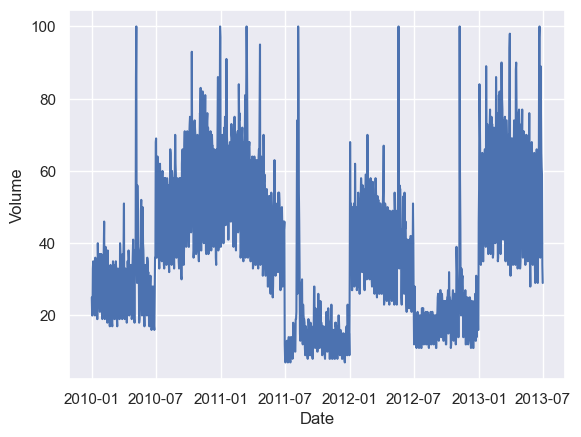

In [16]:
plt.figure()
plt.plot(adjusted_daily_df['Date'], adjusted_daily_df['volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

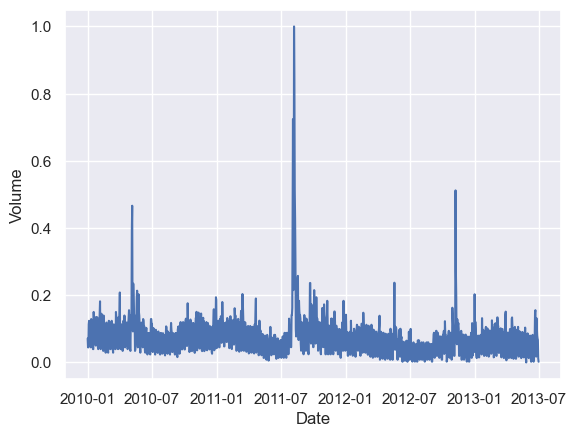

In [17]:
plt.figure()
plt.plot(adjusted_daily_df['Date'], adjusted_daily_df['adjusted_norm'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid

In [18]:
adjusted_daily_df

,Date,volume,adjusted,adjusted_norm
0,2010-01-01,25,22.715612,0.071231
1,2010-01-02,20,18.172490,0.044885
2,2010-01-03,20,18.172490,0.044885
3,2010-01-04,33,29.984608,0.113384
4,2010-01-05,35,31.801857,0.123923
...,...,...,...,...
1272,2013-06-26,65,24.218193,0.079944
1273,2013-06-27,61,22.727843,0.071302
1274,2013-06-28,59,21.982668,0.066980
1275,2013-06-29,34,12.667978,0.012964


In [19]:
search = adjusted_daily_df[['Date', 'adjusted_norm']]
search

,Date,adjusted_norm
0,2010-01-01,0.071231
1,2010-01-02,0.044885
2,2010-01-03,0.044885
3,2010-01-04,0.113384
4,2010-01-05,0.123923
...,...,...
1272,2013-06-26,0.079944
1273,2013-06-27,0.071302
1274,2013-06-28,0.066980
1275,2013-06-29,0.012964


In [20]:
search.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1277 non-null   datetime64[ns]
 1   adjusted_norm  1277 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.1 KB


## Feature selection
Many features are made, which are all lagged for 3-10 days (it starts at 3, because the data is available after three days, thus it prevents future leakage). Then the 50 most correlating (with the target) features are selected and are used for the machine learning algorithm.

Underlying computation can be found in `src/features/build_features.py`.

In [21]:
print(search.columns)


Index(['Date', 'adjusted_norm'], dtype='object')


In [22]:
# 3d, 1w, 2w, 1mo, 3mo.
for length in [3]:
    search[f'SMA_delta-{length}'] = research(search.adjusted_norm, length=length)
    search[f'delta-{length}'] = delta(search.adjusted_norm, length=length)
    search[f'pct_change-{length}'] = pct_change(search.adjusted_norm, length=length)
    search[f'SMA-{length}'] = sma(search.adjusted_norm, length=length)
    search[f'EMA-{length}'] = ema(search.adjusted_norm, length=length)


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_76444/155660295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  search[f'SMA_delta-{length}'] = research(search.adjusted_norm, length=length)


In [23]:
search.head(10)

,Date,adjusted_norm,SMA_delta-3,delta-3,pct_change-3,SMA-3,EMA-3
0,2010-01-01,0.071231,NaN,NaN,NaN,NaN,0.071231
1,2010-01-02,0.044885,NaN,NaN,NaN,NaN,0.058058
2,2010-01-03,0.044885,NaN,NaN,NaN,0.053667,0.051471
3,2010-01-04,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428
4,2010-01-05,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175
5,2010-01-06,0.113384,0.019320,0.068499,1.526106,0.116897,0.108280
6,2010-01-07,0.108115,-0.008782,-0.005269,-0.046472,0.115141,0.108197
7,2010-01-08,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887
8,2010-01-09,0.050154,-0.056205,-0.063230,-0.557662,0.085282,0.076521
9,2010-01-10,0.044885,-0.040397,-0.063230,-0.584841,0.064205,0.060703


In [24]:
features = search.Date.to_frame()
for lag in [3]:
    shifted = search.drop('Date', axis=1).shift(lag)
    shifted.columns = [f'{column}_shifted_by_{lag}' for column in shifted.columns]
    features = pd.concat((features, shifted), axis=1)
    
features = features.dropna()

In [25]:
features

,Date,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3
6,2010-01-07,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428
7,2010-01-08,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175
8,2010-01-09,0.113384,0.019320,0.068499,1.526106,0.116897,0.108280
9,2010-01-10,0.108115,-0.008782,-0.005269,-0.046472,0.115141,0.108197
10,2010-01-11,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887
...,...,...,...,...,...,...,...
1272,2013-06-26,0.017285,-0.093629,-0.131800,-0.884058,0.066980,0.048208
1273,2013-06-27,0.131800,0.064820,-0.023767,-0.152778,0.059058,0.090004
1274,2013-06-28,0.108033,0.048975,0.079944,2.846154,0.085706,0.099019
1275,2013-06-29,0.079944,-0.005762,0.062659,3.625000,0.106593,0.089482


In [26]:
nvda

,Price,Close,High,Low,Open,Volume
0,2010-01-04,0.423854,0.426834,0.415143,0.424313,800204000
1,2010-01-05,0.430043,0.434628,0.422249,0.422249,728648000
2,2010-01-06,0.432794,0.433711,0.425688,0.429814,649168000
3,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000
4,2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000
...,...,...,...,...,...,...
3391,2023-06-26,40.607010,42.737699,40.075336,42.434884,594322000
3392,2023-06-27,41.850250,41.914210,40.423131,40.773913,462175000
3393,2023-06-28,41.091717,41.819270,40.493086,40.634997,582639000
3394,2023-06-29,40.796890,41.574412,40.575027,41.532438,380514000


In [27]:
nvda['target'] = target_binary(nvda.Close)[1:].astype(int)
nvda


,Price,Close,High,Low,Open,Volume,target
0,2010-01-04,0.423854,0.426834,0.415143,0.424313,800204000,NaN
1,2010-01-05,0.430043,0.434628,0.422249,0.422249,728648000,1.0
2,2010-01-06,0.432794,0.433711,0.425688,0.429814,649168000,1.0
3,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000,0.0
4,2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000,1.0
...,...,...,...,...,...,...,...
3391,2023-06-26,40.607010,42.737699,40.075336,42.434884,594322000,0.0
3392,2023-06-27,41.850250,41.914210,40.423131,40.773913,462175000,1.0
3393,2023-06-28,41.091717,41.819270,40.493086,40.634997,582639000,0.0
3394,2023-06-29,40.796890,41.574412,40.575027,41.532438,380514000,0.0


In [28]:
nvda = nvda[1:]

In [29]:
nvda = nvda.drop(['Close', 'High', 'Low', 'Open', 'Volume'], axis=1)
# nvda = nvda.reset_index()
nvda

,Price,target
1,2010-01-05,1.0
2,2010-01-06,1.0
3,2010-01-07,0.0
4,2010-01-08,1.0
5,2010-01-11,0.0
...,...,...
3391,2023-06-26,0.0
3392,2023-06-27,1.0
3393,2023-06-28,0.0
3394,2023-06-29,0.0


In [30]:
nvda = nvda[['Price', 'target']]

In [31]:
nvda.columns = ['Date', 'target']

In [32]:
nvda

,Date,target
1,2010-01-05,1.0
2,2010-01-06,1.0
3,2010-01-07,0.0
4,2010-01-08,1.0
5,2010-01-11,0.0
...,...,...
3391,2023-06-26,0.0
3392,2023-06-27,1.0
3393,2023-06-28,0.0
3394,2023-06-29,0.0


In [33]:
features

,Date,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3
6,2010-01-07,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428
7,2010-01-08,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175
8,2010-01-09,0.113384,0.019320,0.068499,1.526106,0.116897,0.108280
9,2010-01-10,0.108115,-0.008782,-0.005269,-0.046472,0.115141,0.108197
10,2010-01-11,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887
...,...,...,...,...,...,...,...
1272,2013-06-26,0.017285,-0.093629,-0.131800,-0.884058,0.066980,0.048208
1273,2013-06-27,0.131800,0.064820,-0.023767,-0.152778,0.059058,0.090004
1274,2013-06-28,0.108033,0.048975,0.079944,2.846154,0.085706,0.099019
1275,2013-06-29,0.079944,-0.005762,0.062659,3.625000,0.106593,0.089482


In [34]:
features['Date'] = pd.to_datetime(features.Date)
nvda['Date'] = pd.to_datetime(nvda.Date, errors= 'coerce')
data = pd.merge(nvda, features, on='Date')
data['target'] = data.target.astype(int)
# data = data.drop('Date', axis=1)

In [35]:
data

,Date,target,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3
0,2010-01-07,0,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428
1,2010-01-08,1,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175
2,2010-01-11,0,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887
3,2010-01-12,0,0.050154,-0.056205,-0.063230,-0.557662,0.085282,0.076521
4,2010-01-13,1,0.044885,-0.040397,-0.063230,-0.584841,0.064205,0.060703
...,...,...,...,...,...,...,...,...
870,2013-06-24,0,0.155568,0.061939,0.095069,1.571429,0.125318,0.130173
871,2013-06-25,1,0.028089,-0.097230,-0.043213,-0.606061,0.110914,0.079131
872,2013-06-26,0,0.017285,-0.093629,-0.131800,-0.884058,0.066980,0.048208
873,2013-06-27,0,0.131800,0.064820,-0.023767,-0.152778,0.059058,0.090004


In [36]:
df_nvda.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_nvda

,Date,Close,High,Low,Open,Volume
0,2010-01-04,0.423854,0.426834,0.415143,0.424313,800204000
1,2010-01-05,0.430043,0.434628,0.422249,0.422249,728648000
2,2010-01-06,0.432794,0.433711,0.425688,0.429814,649168000
3,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000
4,2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000
...,...,...,...,...,...,...
3391,2023-06-26,40.607010,42.737699,40.075336,42.434884,594322000
3392,2023-06-27,41.850250,41.914210,40.423131,40.773913,462175000
3393,2023-06-28,41.091717,41.819270,40.493086,40.634997,582639000
3394,2023-06-29,40.796890,41.574412,40.575027,41.532438,380514000


In [37]:
df_nvda['Date'] = pd.to_datetime(df_nvda['Date'])
df_nvda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3396 non-null   datetime64[ns]
 1   Close   3396 non-null   float64       
 2   High    3396 non-null   float64       
 3   Low     3396 non-null   float64       
 4   Open    3396 non-null   float64       
 5   Volume  3396 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 159.3 KB


/var/folders/j7/k1zn5v217flb70ktdfw_fzdc0000gn/T/ipykernel_76444/3335413451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nvda['Date'] = pd.to_datetime(df_nvda['Date'])


In [38]:
df_nvda.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [39]:
from sklearn.preprocessing import  MinMaxScaler

df_scaled = df_nvda[:]
cols = ['Close', 'High', 'Low', 'Open', 'Volume']

scaler = MinMaxScaler()

df_scaled[cols] = scaler.fit_transform(df_nvda[cols])

df_scaled



,Date,Close,High,Low,Open,Volume
0,2010-01-04,0.005055,0.005014,0.005109,0.005186,0.206883
1,2010-01-05,0.005197,0.005192,0.005276,0.005138,0.187264
2,2010-01-06,0.005260,0.005171,0.005357,0.005313,0.165472
3,2010-01-07,0.005066,0.005139,0.005249,0.005329,0.137677
4,2010-01-08,0.005087,0.005045,0.005184,0.005107,0.118588
...,...,...,...,...,...,...
3391,2023-06-26,0.927163,0.971998,0.939400,0.975982,0.150435
3392,2023-06-27,0.955693,0.953178,0.947594,0.937600,0.114203
3393,2023-06-28,0.938286,0.951008,0.949241,0.934390,0.147231
3394,2023-06-29,0.931520,0.945412,0.951172,0.955128,0.091814


In [40]:
data = pd.merge(df_scaled, data, on='Date')
data


,Date,Close,High,Low,Open,Volume,target,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3
0,2010-01-07,0.005066,0.005139,0.005249,0.005329,0.137677,0,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428
1,2010-01-08,0.005087,0.005045,0.005184,0.005107,0.118588,1,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175
2,2010-01-11,0.004950,0.005071,0.005065,0.005260,0.140095,0,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887
3,2010-01-12,0.004624,0.004736,0.004666,0.004926,0.159513,0,0.050154,-0.056205,-0.063230,-0.557662,0.085282,0.076521
4,2010-01-13,0.004750,0.004673,0.004563,0.004805,0.127005,1,0.044885,-0.040397,-0.063230,-0.584841,0.064205,0.060703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,2013-06-24,0.002888,0.002932,0.002974,0.003042,0.146720,0,0.155568,0.061939,0.095069,1.571429,0.125318,0.130173
871,2013-06-25,0.002942,0.002884,0.003062,0.003074,0.112883,1,0.028089,-0.097230,-0.043213,-0.606061,0.110914,0.079131
872,2013-06-26,0.002899,0.002937,0.003067,0.003134,0.146440,0,0.017285,-0.093629,-0.131800,-0.884058,0.066980,0.048208
873,2013-06-27,0.002830,0.002830,0.002946,0.003026,0.209030,0,0.131800,0.064820,-0.023767,-0.152778,0.059058,0.090004


In [41]:
data_date_close = data[['Date', 'Close']]
data_date_close

,Date,Close
0,2010-01-07,0.005066
1,2010-01-08,0.005087
2,2010-01-11,0.004950
3,2010-01-12,0.004624
4,2010-01-13,0.004750
...,...,...
870,2013-06-24,0.002888
871,2013-06-25,0.002942
872,2013-06-26,0.002899
873,2013-06-27,0.002830


In [42]:
X = data.drop('target', axis=1)
y= data.target

In [43]:
y

0      0
1      1
2      0
3      0
4      1
      ..
870    0
871    1
872    0
873    0
874    1
Name: target, Length: 875, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=20)

In [45]:
X_train

,Date,Close,High,Low,Open,Volume,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3
0,2010-01-07,0.005066,0.005139,0.005249,0.005329,0.137677,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428
1,2010-01-08,0.005087,0.005045,0.005184,0.005107,0.118588,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175
2,2010-01-11,0.004950,0.005071,0.005065,0.005260,0.140095,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887
3,2010-01-12,0.004624,0.004736,0.004666,0.004926,0.159513,0.050154,-0.056205,-0.063230,-0.557662,0.085282,0.076521
4,2010-01-13,0.004750,0.004673,0.004563,0.004805,0.127005,0.044885,-0.040397,-0.063230,-0.584841,0.064205,0.060703
...,...,...,...,...,...,...,...,...,...,...,...,...
695,2012-10-09,0.002109,0.002169,0.002268,0.002347,0.087933,0.025387,-0.061074,-0.057257,-0.692815,0.067376,0.055687
696,2012-10-10,0.001994,0.002012,0.002144,0.002177,0.077023,0.036838,-0.030537,-0.045806,-0.554252,0.052107,0.046263
697,2012-10-11,0.002031,0.001980,0.002155,0.002156,0.075363,0.122724,0.070617,0.028629,0.304250,0.061650,0.084493
698,2012-10-12,0.001973,0.001938,0.002106,0.002082,0.058962,0.082644,0.020994,0.057257,2.255365,0.080736,0.083569


In [46]:
X_train_date = X_train['Date']
X_test_date = X_test['Date']

In [47]:
X_test_date

700   2012-10-16
701   2012-10-17
702   2012-10-18
703   2012-10-19
704   2012-10-22
         ...    
870   2013-06-24
871   2013-06-25
872   2013-06-26
873   2013-06-27
874   2013-06-28
Name: Date, Length: 175, dtype: datetime64[ns]

In [48]:
X_train_date

0     2010-01-07
1     2010-01-08
2     2010-01-11
3     2010-01-12
4     2010-01-13
         ...    
695   2012-10-09
696   2012-10-10
697   2012-10-11
698   2012-10-12
699   2012-10-15
Name: Date, Length: 700, dtype: datetime64[ns]

In [49]:
cols = ['Close', 'High', 'Low', 'Open', 'Volume',
       'adjusted_norm_shifted_by_3', 'SMA_delta-3_shifted_by_3',
       'delta-3_shifted_by_3', 'pct_change-3_shifted_by_3',
       'SMA-3_shifted_by_3', 'EMA-3_shifted_by_3']
X_train = X_train[cols]
X_test = X_test[cols]
X_train

,Close,High,Low,Open,Volume,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3
0,0.005066,0.005139,0.005249,0.005329,0.137677,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428
1,0.005087,0.005045,0.005184,0.005107,0.118588,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175
2,0.004950,0.005071,0.005065,0.005260,0.140095,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887
3,0.004624,0.004736,0.004666,0.004926,0.159513,0.050154,-0.056205,-0.063230,-0.557662,0.085282,0.076521
4,0.004750,0.004673,0.004563,0.004805,0.127005,0.044885,-0.040397,-0.063230,-0.584841,0.064205,0.060703
...,...,...,...,...,...,...,...,...,...,...,...
695,0.002109,0.002169,0.002268,0.002347,0.087933,0.025387,-0.061074,-0.057257,-0.692815,0.067376,0.055687
696,0.001994,0.002012,0.002144,0.002177,0.077023,0.036838,-0.030537,-0.045806,-0.554252,0.052107,0.046263
697,0.002031,0.001980,0.002155,0.002156,0.075363,0.122724,0.070617,0.028629,0.304250,0.061650,0.084493
698,0.001973,0.001938,0.002106,0.002082,0.058962,0.082644,0.020994,0.057257,2.255365,0.080736,0.083569


## Machine Learning
Comparing different machine learning frameworks and utilising various parameters.

### XGBoost

In [50]:
parameters = {'learning_rate': [0.1, 0.01, 0.001],
               'gamma': [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               'max_depth': [2, 4, 7, 10],
               'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
               'subsample': [0.2, 0.4, 0.5, 0.6, 0.7],
               'reg_alpha': [0, 0.5, 1],
               'reg_lambda': [1, 1.5, 2, 3, 4.5],
               'min_child_weight': [1, 3, 5, 7],
               'n_estimators': [100, 250, 500, 1000],
}

rf = RandomizedSearchCV(XGBClassifier(), param_distributions=parameters,
                        cv=5, n_iter=20, scoring='f1', n_jobs=-1, random_state=10)

rf.fit(X_train, y_train)
y_test_preds = rf.predict(X_test)
y_train_preds = rf.predict(X_train)

In [51]:
print('Accuracy:', accuracy_score(y_test, y_test_preds))
print('F1:', f1_score(y_test, y_test_preds))
print('Recall:', recall_score(y_test, y_test_preds))
print('Precision:', precision_score(y_test, y_test_preds))

Accuracy: 0.6857142857142857
F1: 0.6706586826347305
Recall: 0.6746987951807228
Precision: 0.6666666666666666


In [53]:
X_all = X_train.copy()
X_all['model_pred'] = y_train_preds
X_all


,Close,High,Low,Open,Volume,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3,model_pred
0,0.005066,0.005139,0.005249,0.005329,0.137677,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428,0
1,0.005087,0.005045,0.005184,0.005107,0.118588,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175,1
2,0.004950,0.005071,0.005065,0.005260,0.140095,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887,0
3,0.004624,0.004736,0.004666,0.004926,0.159513,0.050154,-0.056205,-0.063230,-0.557662,0.085282,0.076521,0
4,0.004750,0.004673,0.004563,0.004805,0.127005,0.044885,-0.040397,-0.063230,-0.584841,0.064205,0.060703,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.002109,0.002169,0.002268,0.002347,0.087933,0.025387,-0.061074,-0.057257,-0.692815,0.067376,0.055687,0
696,0.001994,0.002012,0.002144,0.002177,0.077023,0.036838,-0.030537,-0.045806,-0.554252,0.052107,0.046263,0
697,0.002031,0.001980,0.002155,0.002156,0.075363,0.122724,0.070617,0.028629,0.304250,0.061650,0.084493,1
698,0.001973,0.001938,0.002106,0.002082,0.058962,0.082644,0.020994,0.057257,2.255365,0.080736,0.083569,0


In [54]:
X_train_with_all_columns = X_all.merge(data_date_close, on='Close', how='left')
X_train_with_all_columns

,Close,High,Low,Open,Volume,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3,model_pred,Date
0,0.005066,0.005139,0.005249,0.005329,0.137677,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428,0,2010-01-07
1,0.005066,0.005139,0.005249,0.005329,0.137677,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428,0,2011-04-14
2,0.005087,0.005045,0.005184,0.005107,0.118588,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175,1,2010-01-08
3,0.004950,0.005071,0.005065,0.005260,0.140095,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887,0,2010-01-11
4,0.004624,0.004736,0.004666,0.004926,0.159513,0.050154,-0.056205,-0.063230,-0.557662,0.085282,0.076521,0,2010-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,0.002031,0.001980,0.002155,0.002156,0.075363,0.122724,0.070617,0.028629,0.304250,0.061650,0.084493,1,2012-05-16
1210,0.002031,0.001980,0.002155,0.002156,0.075363,0.122724,0.070617,0.028629,0.304250,0.061650,0.084493,1,2012-10-11
1211,0.001973,0.001938,0.002106,0.002082,0.058962,0.082644,0.020994,0.057257,2.255365,0.080736,0.083569,0,2012-05-03
1212,0.001973,0.001938,0.002106,0.002082,0.058962,0.082644,0.020994,0.057257,2.255365,0.080736,0.083569,0,2012-10-12


In [ ]:
# Min-Max +  XGBoost + GGTrend
# Accuracy: 0.6857142857142857
# F1: 0.6706586826347305
# Recall: 0.6746987951807228
# Precision: 0.6666666666666666


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rf_parameters = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3,5,10,20,None],
    'min_samples_split': [2,5,10, 20],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}

In [ ]:
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=10),
                              param_distributions=rf_parameters,
                              n_iter=20,
                              cv = 5,
                              n_jobs=-1,
                              random_state=10,
                              scoring='f1')

In [ ]:
rf_model.fit(X_train, y_train)

In [ ]:

X_train_hd = X_train.replace([np.inf, -np.inf], np.nan)
X_test_hd = X_test.replace([np.inf, -np.inf], np.nan)


y_test_pred = rf_model.predict(X_test_hd)
y_train_pred = rf_model.predict(X_train_hd)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('F1:', f1_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))

In [ ]:
# Accuracy: 0.6171428571428571
# F1: 0.6081871345029239
# Recall: 0.6265060240963856
# Precision: 0.5909090909090909

In [ ]:
# 0nly ML

In [ ]:
df_scaled

In [ ]:
nvda

In [ ]:
data_pure_ml = pd.merge(df_scaled, nvda, on='Date')
data_pure_ml

In [ ]:
X = data.drop('target', axis=1)
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=20)
X_train_date = X_train['Date']
X_test_date = X_test['Date']

cols = ['Close', 'High', 'Low', 'Open', 'Volume']
X_train = X_train[cols]
X_test = X_test[cols]
X_train

In [ ]:
parameters = {'learning_rate': [0.1, 0.01, 0.001],
               'gamma': [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               'max_depth': [2, 4, 7, 10],
               'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
               'subsample': [0.2, 0.4, 0.5, 0.6, 0.7],
               'reg_alpha': [0, 0.5, 1],
               'reg_lambda': [1, 1.5, 2, 3, 4.5],
               'min_child_weight': [1, 3, 5, 7],
               'n_estimators': [100, 250, 500, 1000],
}

rf = RandomizedSearchCV(XGBClassifier(), param_distributions=parameters,
                        cv=5, n_iter=20, scoring='f1', n_jobs=-1, random_state=50)

rf.fit(X_train, y_train)
y_test_preds = rf.predict(X_test)
y_train_preds = rf.predict(X_train)
print('Accuracy:', accuracy_score(y_test, y_test_preds))
print('F1:', f1_score(y_test, y_test_preds))
print('Recall:', recall_score(y_test, y_test_preds))
print('Precision:', precision_score(y_test, y_test_preds))

In [ ]:
rf_parameters = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3,5,10,20,None],
    'min_samples_split': [2,5,10, 20],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=50),
                              param_distributions=rf_parameters,
                              n_iter=20,
                              cv = 5,
                              n_jobs=-1,
                              random_state=50,
                              scoring='f1')
rf_model.fit(X_train, y_train)

X_train_hd = X_train.replace([np.inf, -np.inf], np.nan)
X_test_hd = X_test.replace([np.inf, -np.inf], np.nan)


y_test_pred = rf_model.predict(X_test_hd)
y_train_pred = rf_model.predict(X_train_hd)
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('F1:', f1_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))

In [ ]:
# Accuracy: 0.6857142857142857
# F1: 0.6706586826347305
# Recall: 0.6746987951807228
# Precision: 0.6666666666666666

# add regression

In [59]:
X_train_with_all_columns = X_train_with_all_columns[['adjusted_norm_shifted_by_3',
       'SMA_delta-3_shifted_by_3', 'delta-3_shifted_by_3',
       'pct_change-3_shifted_by_3', 'SMA-3_shifted_by_3', 'EMA-3_shifted_by_3',
       'model_pred', 'Date']]

X_train_with_all_columns

,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3,model_pred,Date
0,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428,0,2010-01-07
1,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428,0,2011-04-14
2,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175,1,2010-01-08
3,0.097577,-0.017564,-0.026346,-0.212599,0.106359,0.102887,0,2010-01-11
4,0.050154,-0.056205,-0.063230,-0.557662,0.085282,0.076521,0,2010-01-12
...,...,...,...,...,...,...,...,...
1209,0.122724,0.070617,0.028629,0.304250,0.061650,0.084493,1,2012-05-16
1210,0.122724,0.070617,0.028629,0.304250,0.061650,0.084493,1,2012-10-11
1211,0.082644,0.020994,0.057257,2.255365,0.080736,0.083569,0,2012-05-03
1212,0.082644,0.020994,0.057257,2.255365,0.080736,0.083569,0,2012-10-12


In [57]:
df_nvda

,Date,Close,High,Low,Open,Volume
0,2010-01-04,0.423854,0.426834,0.415143,0.424313,800204000
1,2010-01-05,0.430043,0.434628,0.422249,0.422249,728648000
2,2010-01-06,0.432794,0.433711,0.425688,0.429814,649168000
3,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000
4,2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000
...,...,...,...,...,...,...
3391,2023-06-26,40.607010,42.737699,40.075336,42.434884,594322000
3392,2023-06-27,41.850250,41.914210,40.423131,40.773913,462175000
3393,2023-06-28,41.091717,41.819270,40.493086,40.634997,582639000
3394,2023-06-29,40.796890,41.574412,40.575027,41.532438,380514000


In [61]:
X_train_with_all_columns = X_train_with_all_columns.merge(df_nvda, on='Date', how='inner')
X_train_with_all_columns

,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3,model_pred,Date,Close,High,Low,Open,Volume
0,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428,0,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000
1,0.092687,0.040497,-0.005282,-0.053917,0.050429,0.069637,1,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000
2,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428,0,2011-04-14,0.424313,0.424542,0.401160,0.403452,1254704000
3,0.092687,0.040497,-0.005282,-0.053917,0.050429,0.069637,1,2011-04-14,0.424313,0.424542,0.401160,0.403452,1254704000
4,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175,1,2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,0.076918,0.049623,0.011451,0.174919,0.031113,0.050252,1,2012-10-04,0.312217,0.314051,0.298005,0.299609,502608000
1210,0.076918,0.045806,0.068708,8.368942,0.054016,0.063585,0,2012-10-05,0.304882,0.316343,0.303735,0.313134,483068000
1211,0.025387,-0.061074,-0.057257,-0.692815,0.067376,0.055687,0,2012-10-09,0.295483,0.302360,0.294566,0.301443,366360000
1212,0.036838,-0.030537,-0.045806,-0.554252,0.052107,0.046263,0,2012-10-10,0.290440,0.295483,0.289294,0.294108,326568000


In [63]:
X_train_with_all_columns['target_price'] = X_train_with_all_columns['Close'].shift(-1)
X_train_with_all_columns = X_train_with_all_columns.dropna()  # ลบ NaN แถวสุดท้าย


In [64]:
X_train_with_all_columns

,adjusted_norm_shifted_by_3,SMA_delta-3_shifted_by_3,delta-3_shifted_by_3,pct_change-3_shifted_by_3,SMA-3_shifted_by_3,EMA-3_shifted_by_3,model_pred,Date,Close,High,Low,Open,Volume,target_price
0,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428,0,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000,0.424313
1,0.092687,0.040497,-0.005282,-0.053917,0.050429,0.069637,1,2010-01-07,0.424313,0.432336,0.421104,0.430502,547792000,0.424313
2,0.113384,0.059717,0.042153,0.591786,0.067718,0.082428,0,2011-04-14,0.424313,0.424542,0.401160,0.403452,1254704000,0.424313
3,0.092687,0.040497,-0.005282,-0.053917,0.050429,0.069637,1,2011-04-14,0.424313,0.424542,0.401160,0.403452,1254704000,0.425230
4,0.123923,0.056205,0.079038,1.760892,0.094064,0.103175,1,2010-01-08,0.425230,0.428210,0.418353,0.420874,478168000,0.419269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,0.094095,0.013360,0.017177,0.223316,0.086461,0.085987,0,2012-10-08,0.301902,0.305111,0.299609,0.303735,240596000,0.312217
1209,0.076918,0.049623,0.011451,0.174919,0.031113,0.050252,1,2012-10-04,0.312217,0.314051,0.298005,0.299609,502608000,0.304882
1210,0.076918,0.045806,0.068708,8.368942,0.054016,0.063585,0,2012-10-05,0.304882,0.316343,0.303735,0.313134,483068000,0.295483
1211,0.025387,-0.061074,-0.057257,-0.692815,0.067376,0.055687,0,2012-10-09,0.295483,0.302360,0.294566,0.301443,366360000,0.290440


In [66]:
X = X_train_with_all_columns.drop(columns=['target_price', 'Date'])  # ใช้ features ทั้งหมด ยกเว้น target กับวันที่
y = X_train_with_all_columns['target_price']


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [69]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 4. Normalize (จำเป็นสำหรับ SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [70]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [72]:
scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Flatten เป็น 1D array

array([ 1.25609762e+00,  1.25609762e+00,  1.25609762e+00,  1.26960386e+00,
        1.18179992e+00,  9.72424912e-01,  9.72424912e-01,  9.72424912e-01,
        9.72424912e-01,  1.05347376e+00,  9.58917357e-01,  9.58917357e-01,
        9.58917357e-01,  9.58917357e-01,  9.58917357e-01,  9.58917357e-01,
        9.58917357e-01,  9.58917357e-01,  9.58917357e-01,  7.83311674e-01,
        8.91376507e-01,  8.67736309e-01,  7.63049463e-01,  7.63049463e-01,
        7.63049463e-01,  7.63049463e-01,  5.63804899e-01,  6.58360860e-01,
        6.58360860e-01,  6.58360860e-01,  6.58360860e-01,  4.79379385e-01,
        4.79379385e-01,  4.79379385e-01,  4.79379385e-01,  4.79379385e-01,
        4.79379385e-01,  4.79379385e-01,  4.79379385e-01,  4.79379385e-01,
        6.27967763e-01,  6.27967763e-01,  6.27967763e-01,  6.27967763e-01,
        4.38853207e-01,  2.02462208e-01,  6.00950896e-01,  7.05639499e-01,
        7.05639499e-01,  7.05639499e-01,  7.05639499e-01,  3.74690344e-01,
        3.74690344e-01,  

In [73]:
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Flatten เป็น 1D array
y_train_scaled

array([ 1.25609762e+00,  1.25609762e+00,  1.25609762e+00,  1.26960386e+00,
        1.18179992e+00,  9.72424912e-01,  9.72424912e-01,  9.72424912e-01,
        9.72424912e-01,  1.05347376e+00,  9.58917357e-01,  9.58917357e-01,
        9.58917357e-01,  9.58917357e-01,  9.58917357e-01,  9.58917357e-01,
        9.58917357e-01,  9.58917357e-01,  9.58917357e-01,  7.83311674e-01,
        8.91376507e-01,  8.67736309e-01,  7.63049463e-01,  7.63049463e-01,
        7.63049463e-01,  7.63049463e-01,  5.63804899e-01,  6.58360860e-01,
        6.58360860e-01,  6.58360860e-01,  6.58360860e-01,  4.79379385e-01,
        4.79379385e-01,  4.79379385e-01,  4.79379385e-01,  4.79379385e-01,
        4.79379385e-01,  4.79379385e-01,  4.79379385e-01,  4.79379385e-01,
        6.27967763e-01,  6.27967763e-01,  6.27967763e-01,  6.27967763e-01,
        4.38853207e-01,  2.02462208e-01,  6.00950896e-01,  7.05639499e-01,
        7.05639499e-01,  7.05639499e-01,  7.05639499e-01,  3.74690344e-01,
        3.74690344e-01,  

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# กำหนดช่วงพารามิเตอร์ที่อยากลอง (sample จาก distributions)
param_dist = {
    'C': [1, 10, 100, 1000, 2000],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto'],
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['rbf']  # ใช้ rbf เท่านั้น
}

# สร้าง RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=param_dist,
    n_iter=20,          # จำนวนครั้งสุ่ม parameter ที่จะลอง
    scoring='neg_mean_squared_error',  # ใช้ MSE เป็น metric
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# เทรน RandomizedSearchCV
random_search.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........C=1, epsilon=0.5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ..........C=1, epsilon=0.5, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .........C=1000, epsilon=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=100, epsilon=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .........C=1000, epsilon=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1000, epsilon=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1000, epsilon=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .........C=1000, epsilon=1, gamma=scal

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000, 2000],
                                        'epsilon': [0.001, 0.01, 0.1, 0.5, 1],
                                        'gamma': [0.001, 0.01, 0.1, 1, 'scale',
                                                  'auto'],
                                        'kernel': ['rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
# แสดง best parameters
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'kernel': 'rbf', 'gamma': 0.001, 'epsilon': 0.01, 'C': 10}


In [78]:
# ทำนายด้วยโมเดลที่ดีที่สุด
best_svr = random_search.best_estimator_
y_pred_scaled = best_svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()



In [79]:
# ประเมินผล
print("MAE:", mean_absolute_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))

MAE: 0.003833516970604443
RMSE: 0.0063097683069985805
R²: 0.9205453225251015
